In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='grade3')

In [2]:
def sample_x3_x4(x1, x2):
    if x1 < 3 and x2 < 3:
        return 'B', 'D'
    elif x1 >=3 and x2 < 3:
        return 'B', 'C'
    elif x1 < 3 and x2 >= 3:
        return 'A', 'D'
    else:
        return 'A', 'C'

In [3]:
x1 = list(np.random.uniform(0,4,40000))
x2 = list(np.random.uniform(0,4,40000))
x3, x4 = [], []
for _x1, _x2 in zip(x1,x2):
    _x3, _x4 = sample_x3_x4(_x1, _x2)
    x3.append(_x3)
    x4.append(_x4)

In [4]:
syn_data = pd.DataFrame(dict(x1=x1, x2=x2, x3=x3, x4=x4))

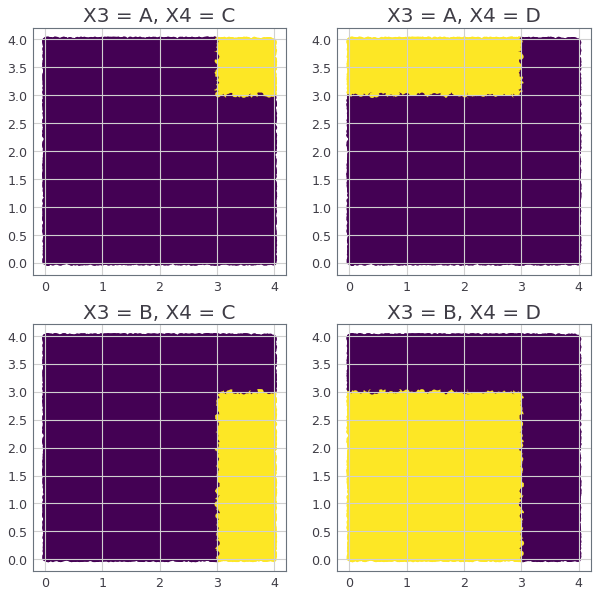

In [17]:
fig, ax = plt.subplots(figsize=(10,10), ncols=2, nrows=2)
ax[0][0].set_title('X3 = A, X4 = C', fontsize= 20)
ax[0][0].scatter(x=syn_data['x1'], y=syn_data['x2'], 
                 c=(np.bitwise_and(syn_data['x3'].apply(lambda x: 1 if x=='A' else 0),
                                   syn_data['x4'].apply(lambda x: 1 if x=='C' else 0))))
ax[0][1].set_title('X3 = A, X4 = D', fontsize= 20)
ax[0][1].scatter(x=syn_data['x1'], y=syn_data['x2'], 
                 c=(np.bitwise_and(syn_data['x3'].apply(lambda x: 1 if x=='A' else 0),
                                   syn_data['x4'].apply(lambda x: 1 if x=='D' else 0))))
ax[1][0].set_title('X3 = B, X4 = C', fontsize= 20)
ax[1][0].scatter(x=syn_data['x1'], y=syn_data['x2'], 
                 c=(np.bitwise_and(syn_data['x3'].apply(lambda x: 1 if x=='B' else 0),
                                   syn_data['x4'].apply(lambda x: 1 if x=='C' else 0))))
ax[1][1].set_title('X3 = B, X4 = D', fontsize= 20)
ax[1][1].scatter(x=syn_data['x1'], y=syn_data['x2'], 
                 c=(np.bitwise_and(syn_data['x3'].apply(lambda x: 1 if x=='B' else 0),
                                   syn_data['x4'].apply(lambda x: 1 if x=='D' else 0))))

In [6]:
from semantic_binning import SemanticBinning

In [7]:
var_dict = dict(
    numerical_vars = ['x1','x2'],
    categorical_vars = ['x3', 'x4'],
)

In [8]:
sb = SemanticBinning(var_dict, 4, 1024, 30, 0.1, verbose=True)

In [9]:
disc_data = sb.fit_transform(syn_data, n_init_bins=20)

>>> Epoch = 1
Loss = 1.7375986576080322
>>> Epoch = 2
Loss = 1.479402780532837
>>> Epoch = 3
Loss = 1.4238224029541016
>>> Epoch = 4
Loss = 1.3222519159317017
>>> Epoch = 5
Loss = 1.28956139087677
>>> Epoch = 6
Loss = 1.2833856344223022
>>> Epoch = 7
Loss = 1.300437092781067
>>> Epoch = 8
Loss = 1.347225308418274
>>> Epoch = 9
Loss = 1.2128524780273438
>>> Epoch = 10
Loss = 1.2670283317565918
>>> Epoch = 11
Loss = 1.241200566291809
>>> Epoch = 12
Loss = 1.3617104291915894
>>> Epoch = 13
Loss = 1.2664281129837036
>>> Epoch = 14
Loss = 1.2353311777114868
>>> Epoch = 15
Loss = 1.258678913116455
>>> Epoch = 16
Loss = 1.269561529159546
>>> Epoch = 17
Loss = 1.2305858135223389
>>> Epoch = 18
Loss = 1.2076213359832764
>>> Epoch = 19
Loss = 1.2405054569244385
>>> Epoch = 20
Loss = 1.2949386835098267
>>> Epoch = 21
Loss = 1.2892645597457886
>>> Epoch = 22
Loss = 1.1836639642715454
>>> Epoch = 23
Loss = 1.226355791091919
>>> Epoch = 24
Loss = 1.2013306617736816
>>> Epoch = 25
Loss = 1.1991279125

In [10]:
sb.bins_by_var

{'x1': {'bins': ['(-0.0009658, 2.997]', '(2.997, 4.0]'],
  'split_point': [-0.0009658, 2.997, 4.0]},
 'x2': {'bins': ['(-0.0009263, 2.999]', '(2.999, 4.0]'],
  'split_point': [-0.0009263, 2.999, 4.0]}}

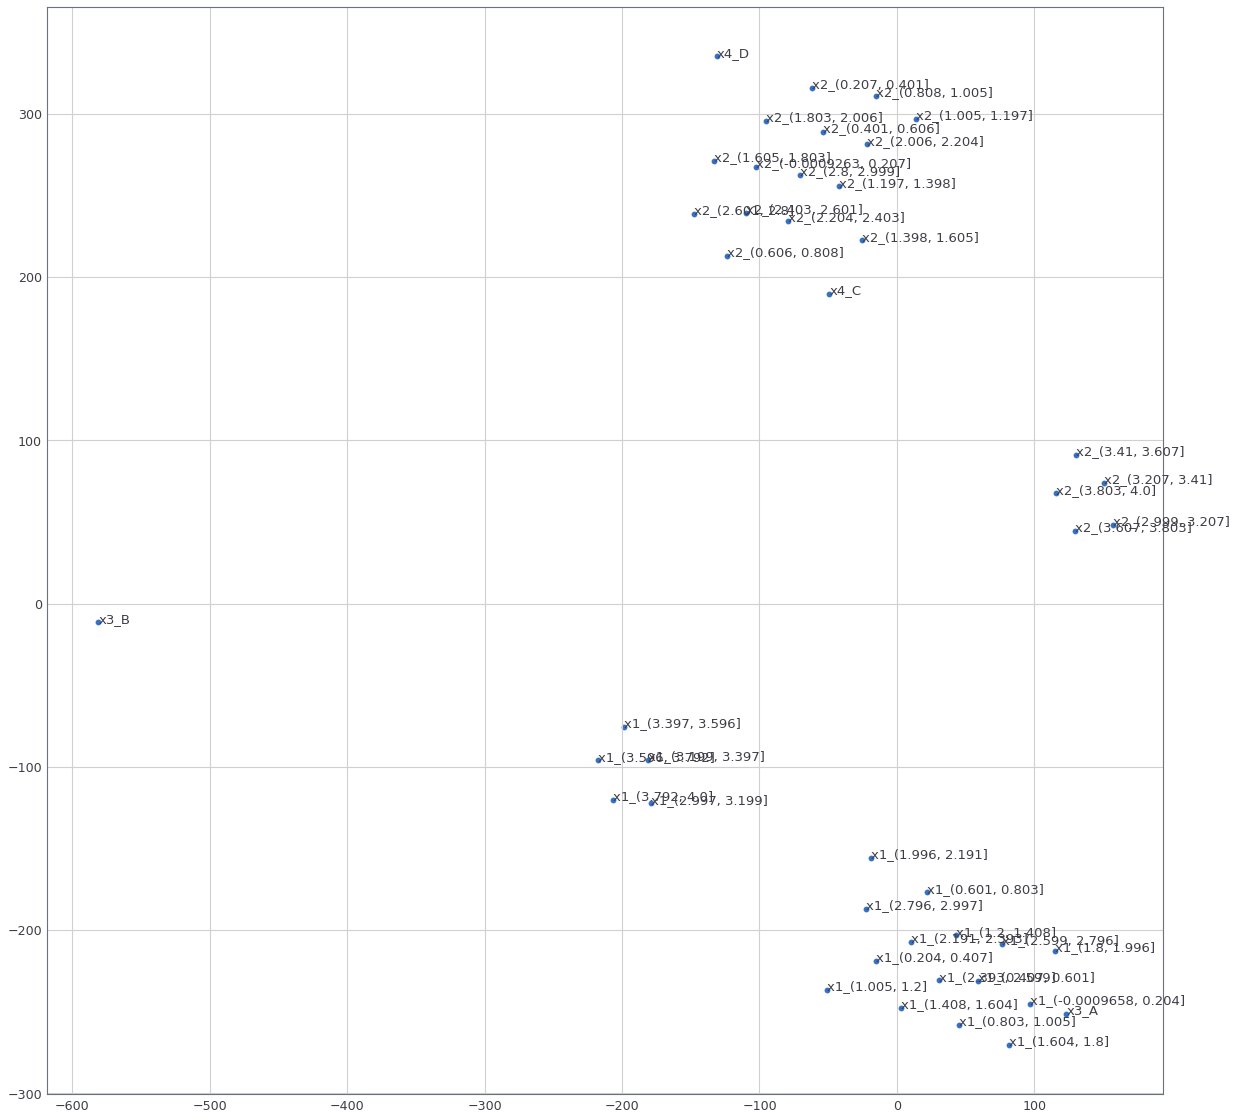

In [16]:
sb.visualize_bin_embeddings(figsize=(20,20))